In [13]:
import tensorflow as tf
import numpy as np
np.set_printoptions(2)

In [4]:
tf.__version__

'2.19.0'

Here we will create a simple algebraic graph to convey the ideas behind TensorFlow. The example below shows a flow graph which computes the resulting velocity $v(t)$ of a vehicle, by given 
- start velocity $v_0$;
- acceleration $a$; and
- acceleration time $t$.
The equation for computing $v(t)$ is: $$v(t) = v_0 + a \cdot t.$$

Remark: For better convenience, the velocities are given in kilometers per hour (km/h). Hence, $v_0$ must be divided by 3.6 to convert it to the SI-unit meters per second (m/s).
A network graph which resembles the equation is shown below:

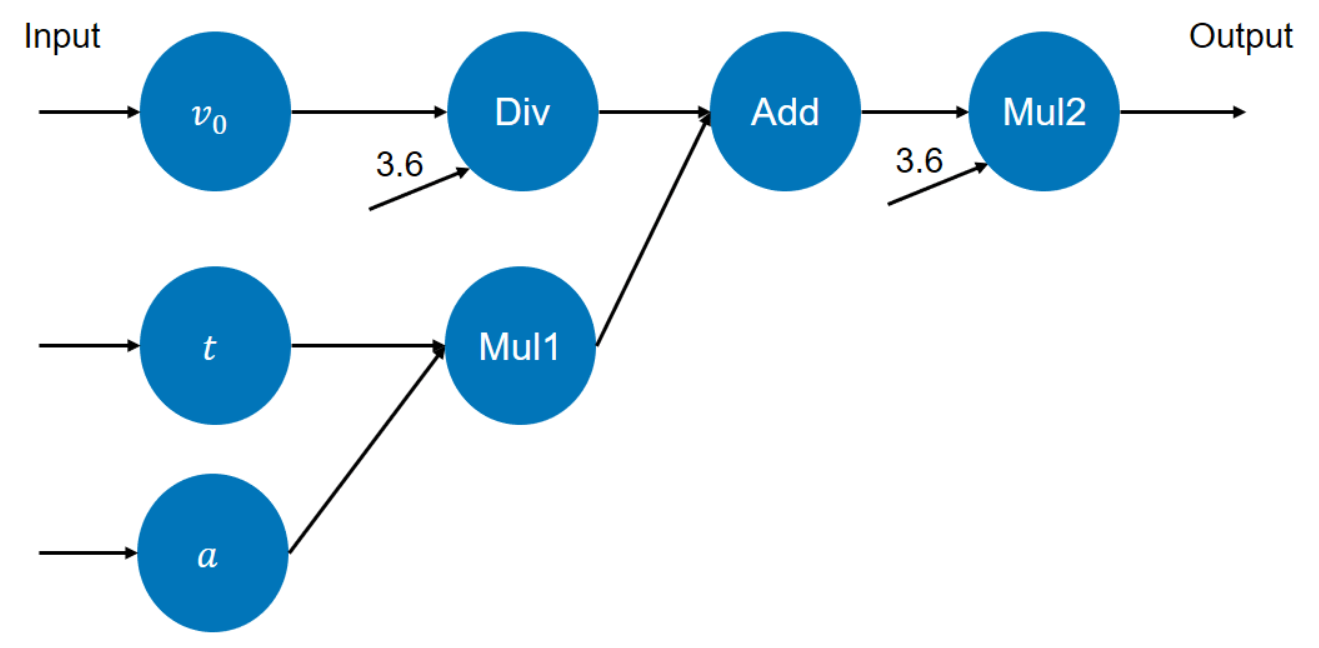

Now, we will create an array of input data, where the first column corresponds to $v_0$, the second column corresponds to $t$ and the last column to $a$.

In [14]:
data = np.array([[30,  5,  6],
                 [20,  2,  9.81],
                 [ 0, 10,  9.81],
                 [90,  1, -2.5]])
print('Entries referring to a: \n', data[:,2], '\n')
print('Column referring to a: \n', data[:,2,None])

Entries referring to a: 
 [ 6.    9.81  9.81 -2.5 ] 

Column referring to a: 
 [[ 6.  ]
 [ 9.81]
 [ 9.81]
 [-2.5 ]]


> __TODO__: Create placeholders for $v_0$, $t$ and $a$

In [19]:
import tensorflow.compat.v1 as tf_v1
tf_v1.disable_v2_behavior()


Instructions for updating:
non-resource variables are not supported in the long term


In [20]:
v_0 = tf_v1.placeholder(tf.float32, [None, 1], name="start_velocity")
t = tf_v1.placeholder(tf.float32, [None, 1], name="time")
a = tf_v1.placeholder(tf.float32, [None, 1], name="acceleration")

> __TODO__: Create nodes of the graph

In [21]:
ms_kmh_const = tf_v1.constant(3.6, tf.float32, name = 'mskmhconst')

v0_ms = tf_v1.divide(v_0, ms_kmh_const)
at = tf_v1.multiply(t, a)
velocity_ms = tf_v1.add(v0_ms, at)
velocity_kmh = tf_v1.multiply(velocity_ms, ms_kmh_const)

> __TODO__: Compute the velocity in meters per second and kilometers per hour

In [24]:
init = tf_v1.global_variables_initializer()
config = tf_v1.ConfigProto(device_count = {'GPU' : 0})

with tf_v1.Session(config=config) as session:
    writer = tf_v1.summary.FileWriter('logdata', session.graph)
    session.run(init)
    output = session.run(velocity_kmh, {v_0: data[:,0,None], t: data[:,1,None], a: data[:,2,None]})
    print('Velocities in km/h: \n', output, '')

writer.close()


Velocities in km/h: 
 [[138.  ]
 [ 90.63]
 [353.16]
 [ 81.  ]] 


In [26]:
init = tf_v1.global_variables_initializer()
config = tf_v1.ConfigProto(device_count = {'GPU' : 0})

with tf_v1.Session(config=config) as session:
    writer = tf_v1.summary.FileWriter('logdata', session.graph)
    session.run(init)
    output = session.run(velocity_ms, {v_0: data[:,0,None], t: data[:,1,None], a: data[:,2,None]})
    print('Velocities in m/s: \n', output, '')

writer.close()

Velocities in m/s: 
 [[38.33]
 [25.18]
 [98.1 ]
 [22.5 ]] 


>__TODO__: Repeat the whole process with tensorflow version 2.x

In [17]:
#using tensorflow version 2.x
def calculate_velocity(v_0, a, t):
    ms_kmh_const = 3.6

    v0_ms = v_0 / ms_kmh_const
    at = t * a

    velocity_ms = v0_ms + at
    velocity_kmh = velocity_ms * ms_kmh_const
    return velocity_ms, velocity_kmh

In [18]:
output_ms, output_kmh = calculate_velocity(data[:,0,None], data[:,1,None], data[:,2,None])
print('Velocities in m/s: \n', output_ms, '\n')
print('Velocities in km/h: \n', output_kmh)

Velocities in m/s: 
 [[38.33]
 [25.18]
 [98.1 ]
 [22.5 ]] 

Velocities in km/h: 
 [[138.  ]
 [ 90.63]
 [353.16]
 [ 81.  ]]
